In [10]:
import sys,os
sys.path.append('../../')
from paths import *
from dadapy import data
import numpy as np
from time import time 
import matplotlib.pyplot as plt


start = time()

eps = 1E-7
L = 30
M_flag = 1
N = L**2
geometry = 'Ising-square'
datafolder = f'/scratch/sacevedo/{geometry}/canonical/'

T_list = np.arange(2.1,3+eps,.1)

for T_id,T in enumerate(T_list):
  datafile = datafolder + f'L{L}/T{T:.2f}.txt'
  X = np.loadtxt(f'{datafile}').astype(int)
  resultsfolder = makefolder(base=f'results/gride/',
                            create_folder=True,
                            L=L,
                            T=T,
                            )
  if M_flag:
    M0 = np.sum(X,axis=1)
    indices = np.where(M0<0)
    X[indices] = - X[indices]
  ### GRIDE
  _data = data.Data(coordinates=X, maxk=X.shape[0]-1)
  range_max = X.shape[0] - 1
  ids_gride, ids_err_gride, rs_gride = _data.return_id_scaling_gride(range_max=range_max)
  ### EXPORTING
  filename='gride.txt'
  np.savetxt(resultsfolder+filename,np.transpose([ids_gride,
                                                  ids_err_gride,
                                                  rs_gride]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


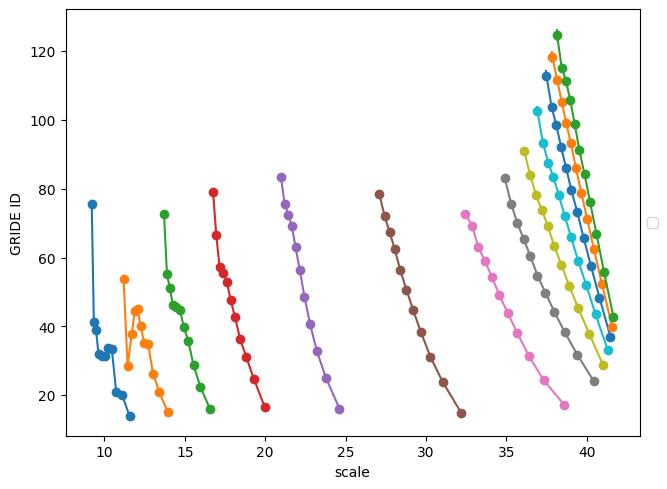

In [12]:
fix,ax = plt.subplots(1)
T_list = np.arange(1.8,3+eps,.1)

for T_id,T in enumerate(T_list):
  resultsfolder = makefolder(base=f'results/gride/',
                            L=L,
                            T=T,
                            )
  ids_gride,ids_err_gride,rs_gride = np.loadtxt(resultsfolder+filename,unpack=True)
  plt.errorbar(rs_gride,ids_gride,ids_err_gride,fmt='o-')


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.xlabel(f'scale')
plt.ylabel(f'GRIDE ID')
plt.show()

In [ ]:

fi,axs = plt.subplots(1)


      # resultsfolder = makefolder(base=f'results/gride/',
      #                       create_folder=False,
      #                       crop_size=crop_size,
      #                       key=key,
      #                       layer_id=layer_id,
      #                       )
      filename='gride.txt'
      (ids_gride,ids_err_gride,rs_gride) = np.loadtxt(resultsfolder+filename,unpack=True)
      axs.errorbar(rs_gride,ids_gride,ids_err_gride,fmt='o-',label=f'{crop_size}')
      
      # selected_scale_id = np.argmax(ids_gride)
      # axs.scatter(rs_gride[selected_scale_id],
      #             ids_gride[selected_scale_id],
      #             marker='*',
      #             color='black',
      #             s=300)
      
      selected_scale_id = np.argmin(np.abs(np.diff(ids_gride)))
      axs.scatter(rs_gride[selected_scale_id],
                  ids_gride[selected_scale_id],
                  marker='*',
                  color='black',
                  s=300)

